<a href="https://colab.research.google.com/github/jenasatwik/Pricing_financial_instruments/blob/main/Hull_White_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
face_value=100
yield_curve = {
    1.0: 4.60,
    1.5: 4.44,
    2.0: 4.30,
    2.5: 4.20,
    3.0: 4.12,
    3.5: 4.05,
    4.0: 4.00,
    4.5: 3.97,
    5.0: 3.94,
    5.5: 3.93,
    6.0: 3.92,
    6.5: 3.92,
    7.0: 3.92,
    7.5: 3.94,
    8.0: 3.95,
    8.5: 3.97,
    9.0: 4.00,
    9.5: 4.02,
    10.0: 4.05,
    10.5: 4.08,
    11.0: 4.12,
    11.5: 4.15,
    12.0: 4.18,
    12.5: 4.21,
    13.0: 4.25,
    13.5: 4.28,
    14.0: 4.31,
    14.5: 4.34,
    15.0: 4.36,
    15.5: 4.39,
    16.0: 4.41,
    16.5: 4.43,
    17.0: 4.45,
    17.5: 4.47,
    18.0: 4.49,
    18.5: 4.51,
    19.0: 4.52,
    19.5: 4.53,
    20.0: 4.54,
    20.5: 4.55,
    21.0: 4.56,
    21.5: 4.56,
    22.0: 4.57,
    22.5: 4.57,
    23.0: 4.57,
    23.5: 4.57,
    24.0: 4.57,
    24.5: 4.57,
    25.0: 4.57,
    25.5: 4.57,
    26.0: 4.57,
    26.5: 4.57,
    27.0: 4.57,
    27.5: 4.57,
    28.0: 4.56,
    28.5: 4.56,
    29.0: 4.56,
    29.5: 4.55,
    30.0: 4.55,
    30.5: 4.54,
    31.0: 4.53,
    31.5: 4.53,
    32.0: 4.52,
    32.5: 4.51,
    33.0: 4.50,
    33.5: 4.50,
    34.0: 4.49,
    34.5: 4.48,
    35.0: 4.47,
    35.5: 4.46,
    36.0: 4.45,
    36.5: 4.44,
    37.0: 4.43,
    37.5: 4.42,
    38.0: 4.41,
    38.5: 4.39,
    39.0: 4.38,
    39.5: 4.37,
    40.0: 4.36
}


Obtaining Forward rates from yield curve

In [28]:
import numpy as np

# Function to calculate zero coupon bond price
def zero_coupon_bond_price(face_value, yield_to_maturity, time_to_maturity):
    return face_value / (1 + yield_to_maturity)**time_to_maturity

# Function to calculate forward rate
def forward_rate(price_t, price_T, time_t, time_T):
    return -(np.log(price_T / price_t) / (1 / (time_T - time_t)))

def calculate_forward_rates(face_value, yield_curve):
  # Derive zero coupon bond prices from the yield curve
  zero_coupon_bond_prices = {}
  for maturity, yield_to_maturity in yield_curve.items():
      price = zero_coupon_bond_price(face_value, yield_to_maturity, maturity)
      zero_coupon_bond_prices[maturity] = price

  # Calculate forward rates
  forward_rates = {}
  for i in range(1, len(yield_curve)):
      maturity_t = list(yield_curve.keys())[i-1]
      maturity_T = list(yield_curve.keys())[i]
      price_t = zero_coupon_bond_prices[maturity_t]
      price_T = zero_coupon_bond_prices[maturity_T]
      rate = forward_rate(price_t, price_T, maturity_t, maturity_T)
      forward_rates[maturity_T] = rate

  return forward_rates

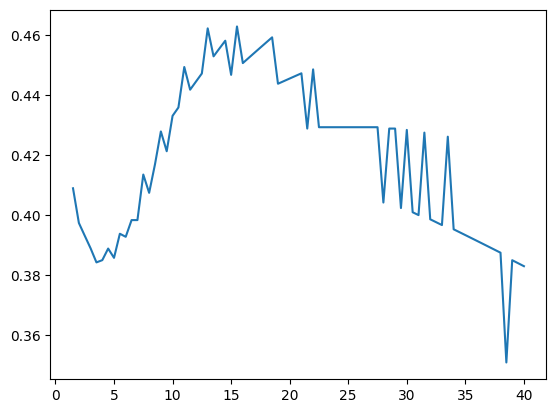

In [29]:
import matplotlib.pyplot as plt
forward_rates=calculate_forward_rates(face_value, yield_curve)
plt.plot(forward_rates.keys(), forward_rates.values())

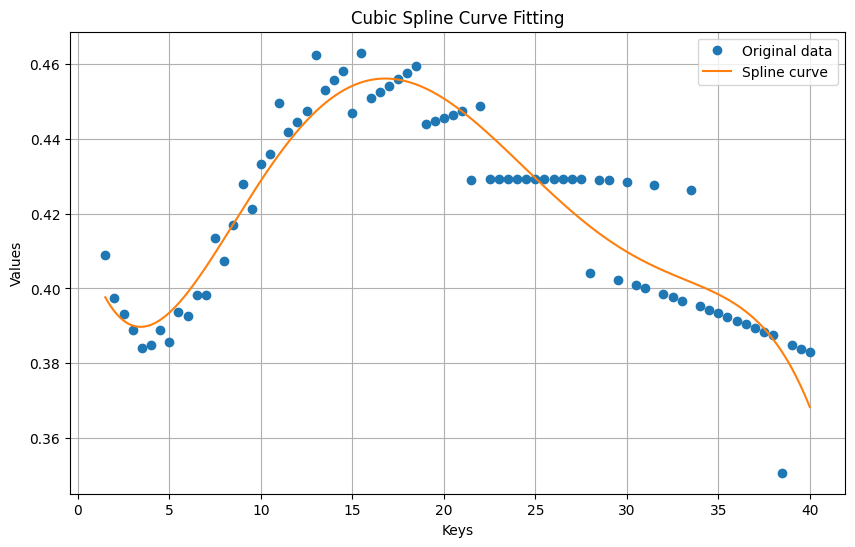

In [41]:
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
keys = np.array(list(forward_rates.keys()))
values = np.array(list(forward_rates.values()))

# Fit cubic spline curve
spline = UnivariateSpline(keys, values, k=5)

# Generate new x values for smooth curve
x_new = np.linspace(keys.min(), keys.max(), 500)

# Evaluate spline curve for new x values
y_new = spline(x_new)

# Plot original data and spline curve
plt.figure(figsize=(10, 6))
plt.plot(keys, values, 'o', label='Original data')
plt.plot(x_new, y_new, '-', label='Spline curve')
plt.title('Cubic Spline Curve Fitting')
plt.xlabel('Keys')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

Obtaining Hullwhite Theta function

In [ ]:
theta=